In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("scores_data.csv")

# Display first 5 rows
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [5]:
# Check shape (rows, columns)
df.shape

# Check column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [15]:
# Check for Missing Values
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [17]:
# Check Duplicate Records
df.duplicated().sum()

0

In [21]:
print(df.columns)

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')


In [31]:
df.columns = df.columns.str.strip()

In [57]:
print(df.columns)

Index(['Batch', 'User_ID', 'Score'], dtype='object')


In [59]:
df['Score'] = df['Score'].astype(str)

# Extract first numeric value from the string
df['Score'] = df['Score'].str.extract(r'(\d+)')

# Convert to numeric
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

In [61]:
# Check Score Range
df['Score'].describe()

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score, dtype: float64

In [63]:
# Unique batches
df['Batch'].unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [65]:
# Check if User_ID is unique
df['User_ID'].nunique() == len(df)

True

In [67]:
# Group data by Batch
batch_groups = df.groupby('Batch')

# View grouped data
batch_groups.size()

Batch
AI_ELITE_4    48
AI_ELITE_6    48
AI_ELITE_7    53
dtype: int64

In [71]:
batch_stats = df.groupby('Batch')['Score'].describe()
batch_stats

,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


In [73]:
# Mean Score per Batch
mean_scores = df.groupby('Batch')['Score'].mean()
mean_scores

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score, dtype: float64

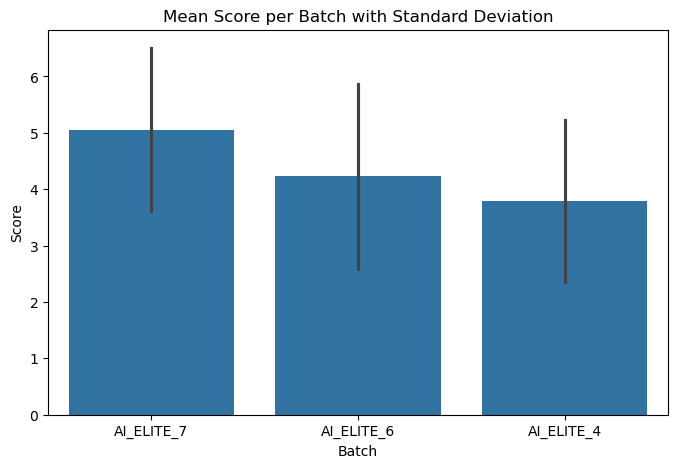

In [97]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Batch',
    y='Score',
    data=df,
    errorbar='sd'
)
plt.title("Mean Score per Batch with Standard Deviation")
plt.show()

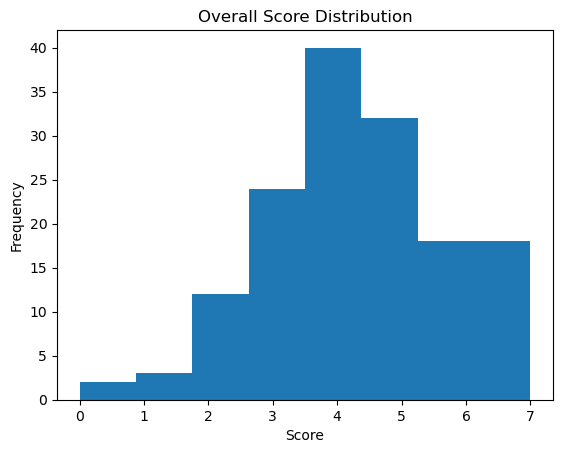

In [105]:
# Score Distribution
plt.figure()
plt.hist(df['Score'], bins=8)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Overall Score Distribution")
plt.show()

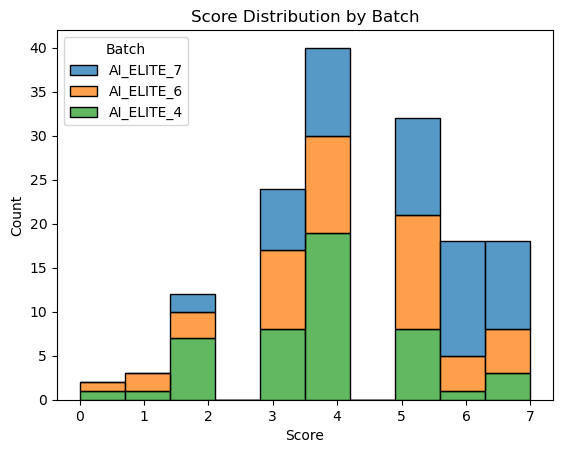

In [77]:
# Score Distribution by Batch
plt.figure()
sns.histplot(data=df, x='Score', hue='Batch', multiple='stack')
plt.title("Score Distribution by Batch")
plt.show()

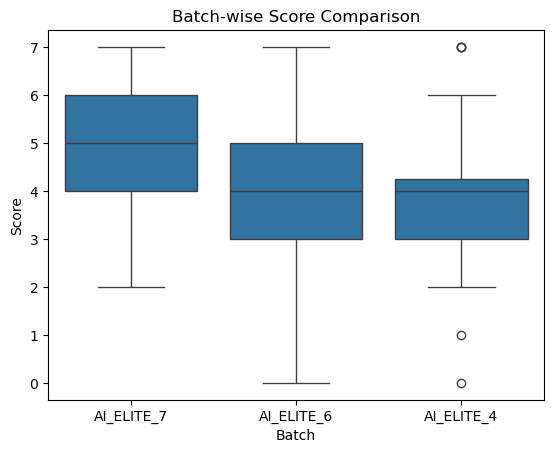

In [79]:
# Box Plot for Batch Comparison
plt.figure()
sns.boxplot(x='Batch', y='Score', data=df)
plt.title("Batch-wise Score Comparison")
plt.show()

In [81]:
## Count of High & Low Performers

# High Performers (Score ≥ 6)
high_performers = df[df['Score'] >= 6].groupby('Batch').size()
high_performers

Batch
AI_ELITE_4     4
AI_ELITE_6     9
AI_ELITE_7    23
dtype: int64

In [83]:
# Low Performers (Score ≤ 2)
low_performers = df[df['Score'] <= 2].groupby('Batch').size()
low_performers

Batch
AI_ELITE_4    9
AI_ELITE_6    6
AI_ELITE_7    2
dtype: int64

In [85]:
# Consistency Analysis (Standard Deviation)
consistency = df.groupby('Batch')['Score'].std()
consistency

Batch
AI_ELITE_4    1.443376
AI_ELITE_6    1.640441
AI_ELITE_7    1.446682
Name: Score, dtype: float64

In [87]:
# Identify Best & Weakest Batch
best_batch = mean_scores.idxmax()
worst_batch = mean_scores.idxmin()

best_batch, worst_batch

('AI_ELITE_7', 'AI_ELITE_4')

In [89]:
# Final Summary Table
summary = pd.DataFrame({
    'Mean Score': mean_scores,
    'Std Deviation': consistency,
    'High Performers (>=6)': high_performers,
    'Low Performers (<=2)': low_performers
})

summary.fillna(0)

,Mean Score,Std Deviation,High Performers (>=6),Low Performers (<=2)
Batch,,,,
AI_ELITE_4,3.791667,1.443376,4,9
AI_ELITE_6,4.229167,1.640441,9,6
AI_ELITE_7,5.056604,1.446682,23,2
